Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Numeric features: ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Categorical features: ['model', 'transmission', 'fuelType', 'Make']

     📊 NEURAL NETWORK ACCURACY COMPARISON


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy with 100 epochs and 50 batch size: 91.53% | R2: 0.9355


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy with 200 epochs and 50 batch size: 91.85% | R2: 0.9389


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy with 100 epochs and 100 batch size: 91.42% | R2: 0.9313


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy with 200 epochs and 100 batch size: 91.46% | R2: 0.9341

--- Summary Table ---
   Epochs  Batch Size  Accuracy (%)         RMSE        R2
0     100          50     91.533869  2326.591928  0.935534
1     200          50     91.852753  2265.826450  0.938857
2     100         100     91.416325  2401.954725  0.931290
3     200         100     91.456983  2352.873244  0.934069
Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 362658368.0000 - val_loss: 293067776.0000
Epoch 2/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 185356656.0000 - val_loss: 31225008.0000
Epoch 3/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 24674952.0000 - val_loss: 23099444.0000
Epoch 4/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19351300.0000 - val_loss: 20846308.0000
Epoch 5/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 18760062.0000 - val_loss: 19514176.0000
Epoch 6/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15922457.0000 - val_loss: 18607464.0000
Epoch 7/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15891505.0000 - val_loss: 17801016.0000
Epoch 8/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14670424.0000 - val_loss: 17185544.0000
Epoch 9/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 15181353.0000 - val_loss: 16643350.0000
Epoch 10/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14075559.0000 - val_loss: 16154397.000

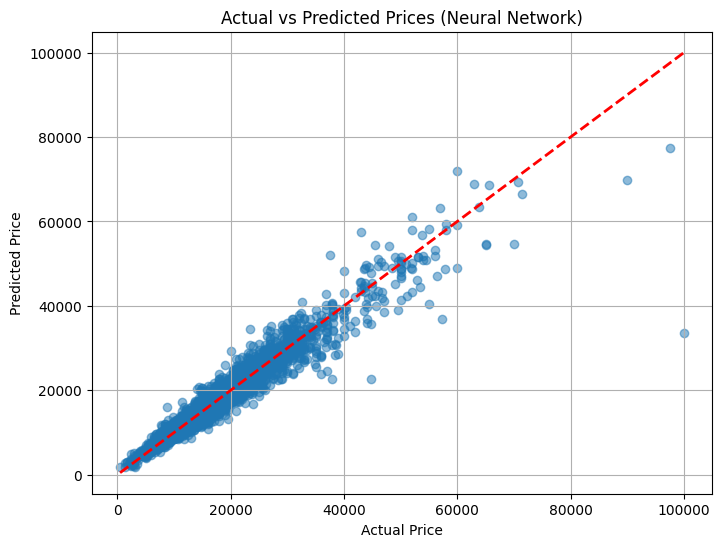

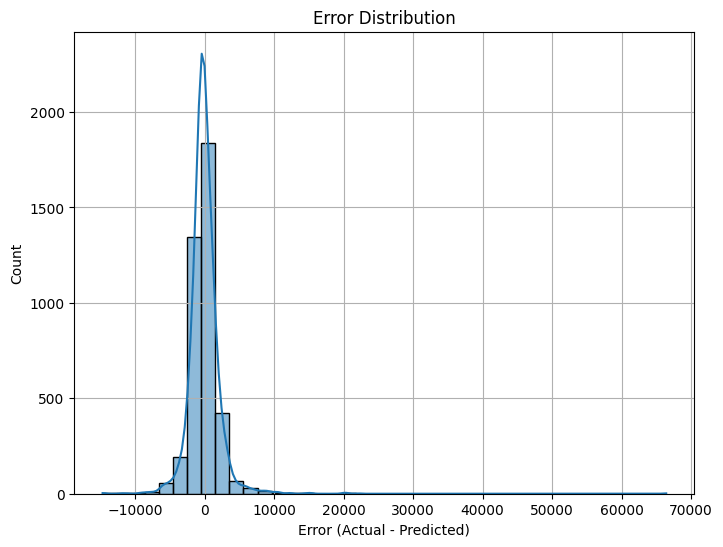

In [9]:
# ===============================
# 0. Imports
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Google Drive
from google.colab import drive
drive.mount('/content/drive')


# 1. Load Dataset
file_path = '/content/drive/MyDrive/cars_dataset_20k.csv'
df = pd.read_csv(file_path)

# 2. Features & Target
X = df.drop('price', axis=1)
y = df['price']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


# 3. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


# 5. Model Builder Function
def build_model(input_dim):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(
        optimizer='adam',
        loss='mean_squared_error'
    )

    return model


# 6. Train with Different Epochs & Batch Sizes
configs = [
    (100, 50),
    (200, 50),
    (100, 100),
    (200, 100),
]

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("\n" + "="*65)
print("     📊 NEURAL NETWORK ACCURACY COMPARISON")
print("="*65)

results = []

for epochs, batch_size in configs:

    model = build_model(X_train_transformed.shape[1])

    model.fit(
        X_train_transformed,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=0
    )

    y_pred = model.predict(X_test_transformed).flatten()

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    accuracy = 100 - mape

    print(
        f"Accuracy with {epochs} epochs "
        f"and {batch_size} batch size: "
        f"{accuracy:.2f}% | R2: {r2:.4f}"
    )

    results.append([epochs, batch_size, accuracy, rmse, r2])

print("="*65)


# 7. Results Table
results_df = pd.DataFrame(
    results,
    columns=["Epochs", "Batch Size", "Accuracy (%)", "RMSE", "R2"]
)

print("\n--- Summary Table ---")
print(results_df)


# 8. Train Final Model (Best Choice)
best_epochs = 200
best_batch_size = 100

final_model = build_model(X_train_transformed.shape[1])

final_model.fit(
    X_train_transformed,
    y_train,
    epochs=best_epochs,
    batch_size=best_batch_size,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

y_pred = final_model.predict(X_test_transformed).flatten()


# 9. Final Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print("\n" + "="*40)
print("       📊 FINAL MODEL REPORT       ")
print("="*40)
print(f"Accuracy (approx): {accuracy:.2f}%")
print(f"RMSE:              {rmse:,.2f}")
print(f"R2 Score:          {r2:.4f}")
print("="*40)


# 10. Visualization

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Neural Network)")
plt.grid(True)
plt.show()

# Error Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel("Error (Actual - Predicted)")
plt.title("Error Distribution")
plt.grid(True)
plt.show()


**Random Forest**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Numeric features: ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Categorical features: ['model', 'transmission', 'fuelType', 'Make']

       📊 MODEL PERFORMANCE REPORT       
Accuracy:     91.97%
R2 Score:     0.9355

--- First 10 Predictions ---
   Actual  Predicted  Difference    Error %
0   10790   12651.96     1861.96  17.256348
1   21422   20909.09     -512.91  -2.394314
2    8495    9074.33      579.33   6.819659
3    7191    7039.46     -151.54  -2.107356
4   23990   29386.56     5396.56  22.495040
5   15299   15311.82       12.82   0.083796
6    9995   11267.57     1272.57  12.732066
7   14012   15667.67     1655.67  11.816086
8   10249   10009.62     -239.38  -2.335643
9    7998    8155.50      157.50   1.969242


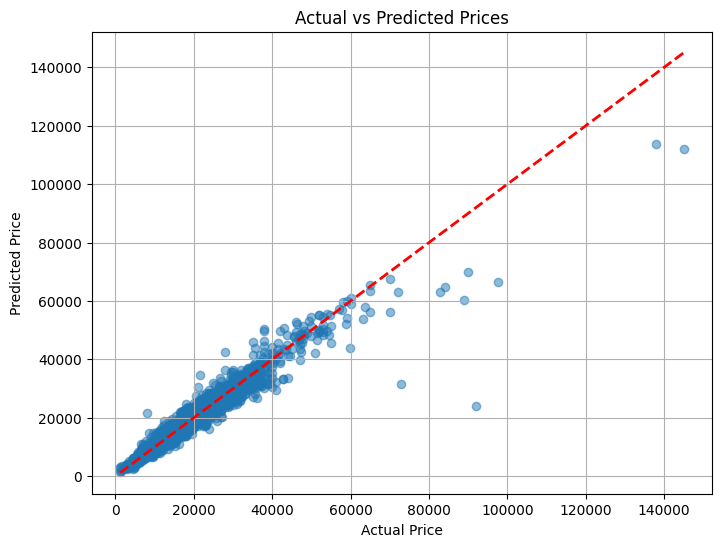

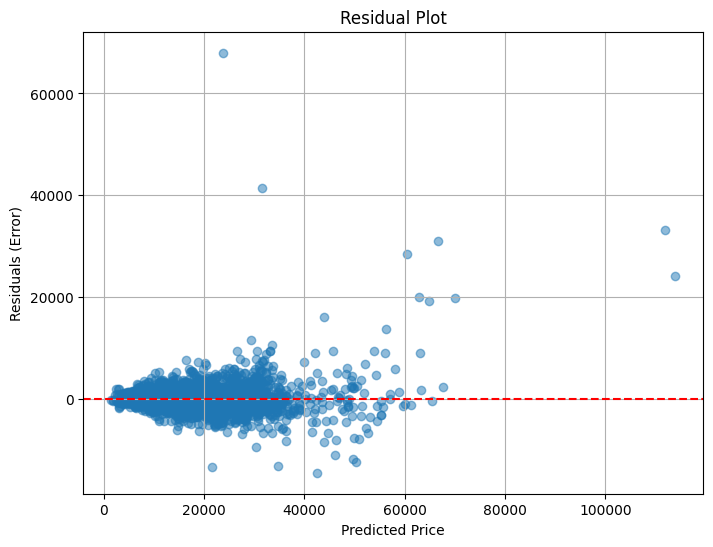

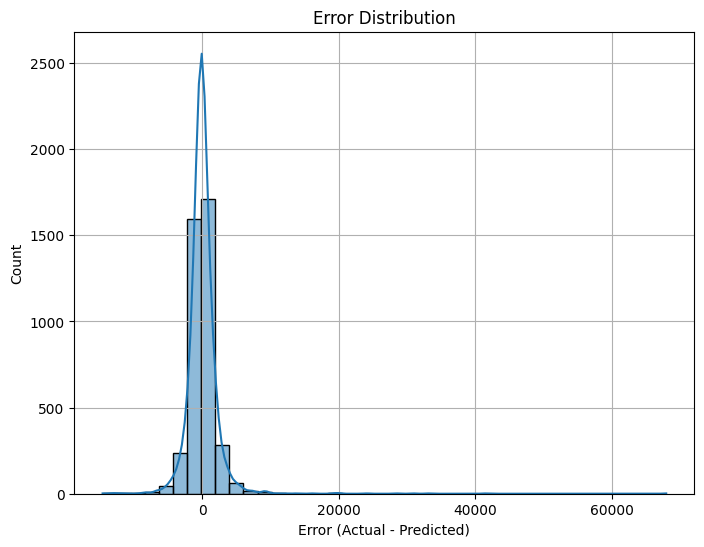

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# 1. Load the Data
file_path = '/content/drive/MyDrive/cars_dataset_20k.csv'
df = pd.read_csv(file_path)


# 2. Features and Target
X = df.drop('price', axis=1)
y = df['price']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# 3. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# 4. Train/Test Split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# 5. RandomForest (ONLY ONE HYPERPARAMETER)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)


# 6. Evaluation

r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print("\n" + "="*40)
print("       📊 MODEL PERFORMANCE REPORT       ")
print("="*40)
print(f"Accuracy:     {accuracy:.2f}%")
print(f"R2 Score:     {r2:.4f}")
print("="*40)

# 7. Comparison Table
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

comparison['Difference'] = comparison['Predicted'] - comparison['Actual']
comparison['Error %'] = (comparison['Difference'] / comparison['Actual']) * 100

print("\n--- First 10 Predictions ---")
print(comparison.head(10))


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel("Error (Actual - Predicted)")
plt.title("Error Distribution")
plt.grid(True)
plt.show()

